<a href="https://colab.research.google.com/github/Danielle504/CAP4630/blob/master/homework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Homework 2

Problem 1

In [0]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

Local Minimum

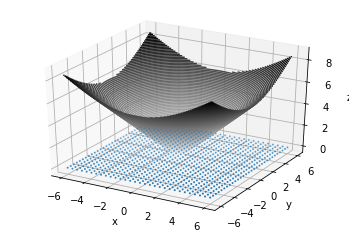

In [0]:
def f(x, y):
    return np.sqrt(x ** 2 + y ** 2)

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 100, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
plt.scatter(X, Y, s=1)

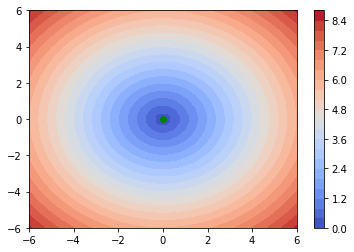

In [0]:
plt.contourf(X, Y, Z, 25, cmap='coolwarm')
plt.plot(0, 0, 'go')
plt.colorbar()

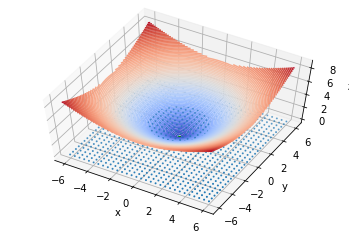

In [0]:
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 100, cmap='coolwarm')
ax.scatter3D(0, 0, f(0,0), marker='o', c='g')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(60)
plt.scatter(X, Y, s=1)

Local Maximum

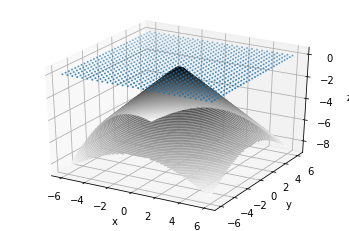

In [0]:
def g(x, y):
  return -np.sqrt(x ** 2 + y ** 2)

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = g(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 100, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
plt.scatter(X, Y, s=1)

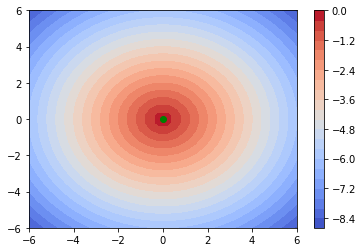

In [0]:
plt.contourf(X, Y, Z, 25, cmap='coolwarm')
plt.plot(0, 0, 'go')
plt.colorbar()

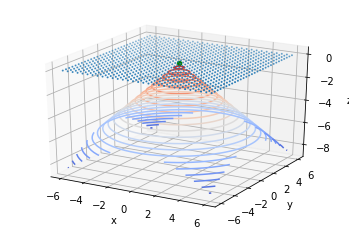

In [0]:
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 25, cmap='coolwarm')
ax.scatter3D(0, 0, f(0,0), marker='o', c='g')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(25)
plt.scatter(X, Y, s=1)

Gradient of the zero vector

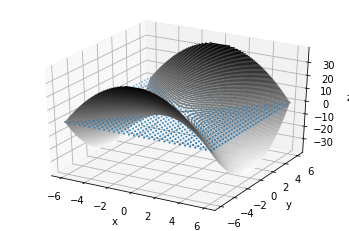

In [0]:
def h(x, y):
  return -(x ** 2) + y ** 2

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = h(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 100, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
plt.scatter(X, Y, s=1)

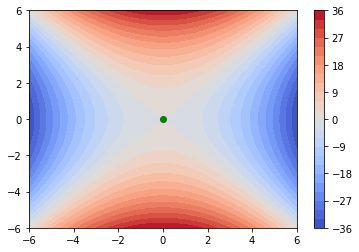

In [0]:
plt.contourf(X, Y, Z, 25, cmap='coolwarm')
plt.plot(0, 0, 'go')
plt.colorbar()

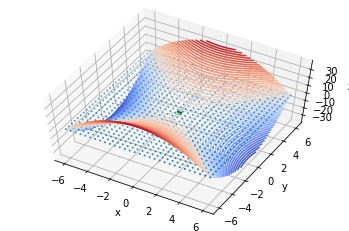

In [0]:
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 60, cmap='coolwarm')
ax.scatter3D(0, 0, f(0,0), marker='o', c='g')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(60)
plt.scatter(X, Y, s=1)

Problem 2

In [0]:
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [0]:
# generate m random pairs (x, y)

m = 100
X = 2 * np.random.rand(m, 1)
X1 = 2 * np.random.rand(m, 1)
X2 = 2 * np.random.rand(m, 1)
X3 = 2 * np.random.rand(m, 1)
y = 4 + 3 * X + 5*X1 + np.random.rand(m, 1)
y1 = 4 + 3 * X2 + 5*X3 + np.random.rand(m, 1)

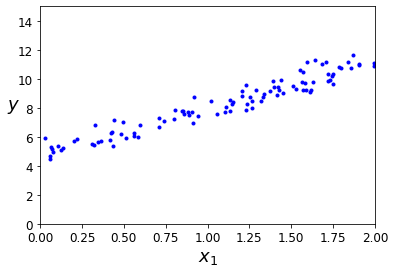

In [72]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [73]:
print(X.shape)

(100, 1)


In [74]:
# show the first 5 rows
print(X[:5, :])

[[1.23600402]
 [0.48413566]
 [1.68190661]
 [0.89167958]
 [1.55013527]]


In [0]:
X_b = np.column_stack([np.ones((m, 1)), X, X1])

In [77]:
print(X_b.shape)

(100, 3)


In [0]:
# number of epochs
epochs = 20
# learning rate
lr = 0.01
# fix initial random weight for gradient descent (batch gradient descent)
np.random.seed(42)
initial_weight = np.random.randn(3, 1)
weight = initial_weight
weight_path_mgd = []
batch_size = 4

weight_path_mgd.append(weight)
for epoch in range(epochs):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, batch_size):
        xi = X_b_shuffled[i:i+batch_size]
        yi = y_shuffled[i:i+batch_size]
        gradient = 1 / batch_size * xi.T.dot(xi.dot(weight) - yi)
        weight = weight - lr * gradient
        weight_path_mgd.append(weight)

In [89]:
weight_path_mgd[-1]

array([[3.41509461],
       [3.28699717],
       [1.28017525]])

In [0]:
weight_path_bgd = []
weight_path_sgd = []
weight_path_bgd = np.array(weight_path_bgd)
weight_path_sgd = np.array(weight_path_sgd)
weight_path_mgd = np.array(weight_path_mgd)

In [0]:
y_hat = weight_path_mgd[-1][0] + weight_path_mgd[-1][1]*X2 +  weight_path_mgd[-1][2]*X3

In [98]:
print(weight_path_mgd)

[[[ 0.49671415]
  [-0.1382643 ]
  [ 0.64768854]]

 [[ 0.57828938]
  [-0.02078586]
  [ 0.73126813]]

 [[ 0.63603065]
  [ 0.01933592]
  [ 0.76095851]]

 ...

 [[ 3.41338095]
  [ 3.28878871]
  [ 1.28613222]]

 [[ 3.41207723]
  [ 3.28521652]
  [ 1.28194696]]

 [[ 3.41509461]
  [ 3.28699717]
  [ 1.28017525]]]


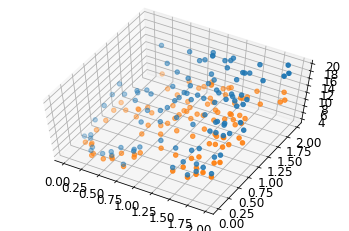

In [110]:
ax = plt.axes(projection='3d')
ax.scatter3D(X2, X3, y1)
ax.scatter3D(X2, X3, y_hat)
ax.view_init(60)

Problem 3

In [0]:
%tensorflow_version 2.x
import tensorflow as tf

(training_image, training_label), (test_image, test_label) = tf.keras.datasets.mnist.load_data()

In [0]:
temp = np.zeros((28, 28))
array = np.array([np.copy(temp), np.copy(temp), np.copy(temp), 
np.copy(temp), np.copy(temp), np.copy(temp), np.copy(temp), np.copy(temp), np.copy(temp), np.copy(temp)])

In [0]:
for n in range(10):
    count = 0
    for i in range(len(training_label)):
        if (training_label[i] == n):
            array[n] = array[n] + training_image[i]
            count = count + 1
    
    array[n] = array[n]/count

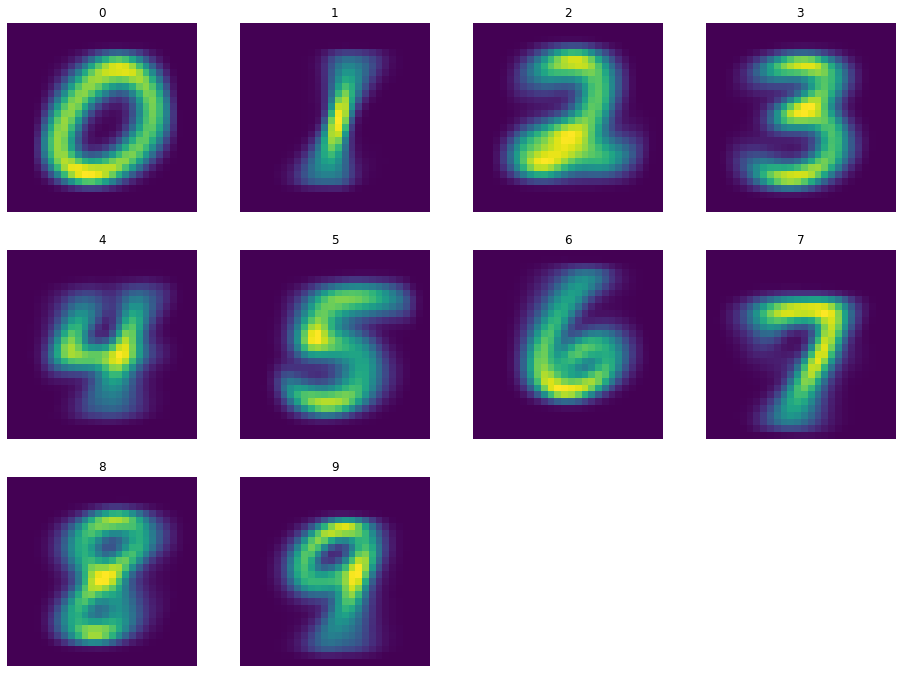

In [122]:
plt.figure(figsize=(16, 16))
for n in range(10):
    ax = plt.subplot(4, 4, n + 1)
    plt.imshow(array[n])
    plt.title(n)
    plt.axis('off')